<h1>Машинне навчання</h1>
<p>Ю.С. Процик. Курс лекцій</p>
<div align="right"><em>Cформовано на основі <a href="https://mlcourse.ai">відкритого курсу</a> Юрія Кашницького</em></div>

# <center>Тема 2. Візуальний аналіз даних з Python
## <center>Частина 1. Огляд бібліотек Seaborn, Matplotlib і Plotly

### План

1. [Набір даних](#1.-Набір-даних)
2. [DataFrame.plot()](#2.-DataFrame.plot())
3. [Seaborn](#3.-Seaborn)
4. [Plotly](#4.-Plotly)
5. [Корисні ресурси](#5.-Корисні-ресурси)



## 1. Набір даних

На початку налаштуємо оточення: імпортуємо всі необхідні бібліотеки і трохи налаштуємо відображення рисунків за замовчуванням.

In [1]:
import pandas as pd

# Matplotlib є основою для візуалізації в Python
import matplotlib.pyplot as plt

# будемо використовувати бібліотеку Seaborn
import seaborn as sns
sns.set()

In [2]:
# графіки у форматі Retina виглядають більш чіткими
%config InlineBackend.figure_format = 'retina' 

# збільшимо розмір графіків за замовчуванням та встановимо кольорову гаму
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['image.cmap'] = 'viridis'

Після цього завантажимо в `DataFrame` дані, з якими будемо працювати. Для прикладів візуалізацій було обрано дані про продажі та оцінки відеоігор з [Kaggle Datasets](https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings). Залишимо тільки ті записи, за якими є повні дані.

In [3]:
df = pd.read_csv('../data/video_games_sales.csv').dropna()
print(df.shape)

(6825, 16)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6825 entries, 0 to 16706
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             6825 non-null   object 
 1   Platform         6825 non-null   object 
 2   Year_of_Release  6825 non-null   float64
 3   Genre            6825 non-null   object 
 4   Publisher        6825 non-null   object 
 5   NA_Sales         6825 non-null   float64
 6   EU_Sales         6825 non-null   float64
 7   JP_Sales         6825 non-null   float64
 8   Other_Sales      6825 non-null   float64
 9   Global_Sales     6825 non-null   float64
 10  Critic_Score     6825 non-null   float64
 11  Critic_Count     6825 non-null   float64
 12  User_Score       6825 non-null   object 
 13  User_Count       6825 non-null   float64
 14  Developer        6825 non-null   object 
 15  Rating           6825 non-null   object 
dtypes: float64(9), object(7)
memory usage: 906.4+ KB


In [5]:
df['User_Score'] = df['User_Score'].astype('float64')
df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
df['User_Count'] = df['User_Count'].astype('int64')
df['Critic_Count'] = df['Critic_Count'].astype('int64')

Всього в таблиці 6825 об'єктів і 16 ознак для них. Подивимося на кілька перших записів з допомогою методу `head`, щоб переконатися, що все зчитано правильно. Для зручності залишимо тільки ті ознаки, які будемо надалі використовувати.

In [6]:
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre', 
               'Global_Sales', 'Critic_Score', 'Critic_Count',
               'User_Score', 'User_Count', 'Rating'
              ]
df[useful_cols].head()

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006,Sports,82.53,76.0,51,8.0,322,E
2,Mario Kart Wii,Wii,2008,Racing,35.52,82.0,73,8.3,709,E
3,Wii Sports Resort,Wii,2009,Sports,32.77,80.0,73,8.0,192,E
6,New Super Mario Bros.,DS,2006,Platform,29.80,89.0,65,8.5,431,E
7,Wii Play,Wii,2006,Misc,28.92,58.0,41,6.6,129,E


## 2. DataFrame.plot()

Перш ніж ми перейдемо до розгляду методів бібліотек `seaborn` і `plotly`, обговоримо найпростіший і часто зручний спосіб візуалізувати дані з `pandas` `dataframe` — це скористатися функцією `plot()`.
Для прикладу побудуємо графік продажів відеоігор в різних регіонах в залежності від року. Для початку відфільтруємо тільки потрібні нам стовпці, потім порахуємо сумарні продажі по роках і в отриманого `dataframe` викличемо функцію `plot()` без параметрів.

Реалізація функції `plot()` в pandas базується на бібліотеці `matplotlib`.

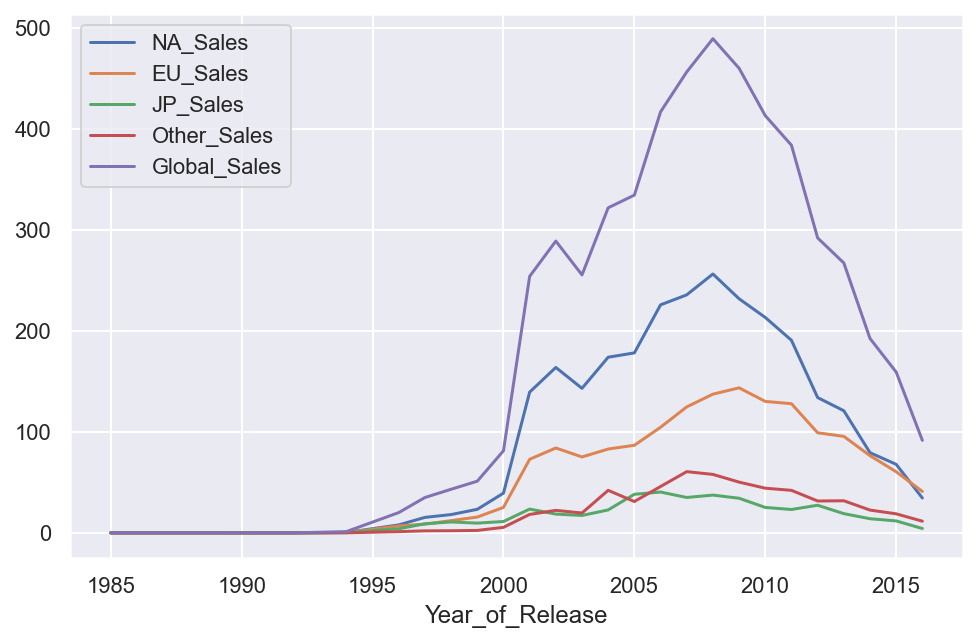

In [7]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot();

За допомогою параметра `kind` можна змінити тип графіка, наприклад, на *bar chart* (стовпчикова діаграма). `Matplotlib` дозволяє дуже гнучко налаштовувати графіки. На графіку можна змінити майже все, що завгодно, але потрібно почитати документацію і знайти потрібні параметри. Наприклад, параметр `rot` відповідає за кут нахилу підписів до осі x.

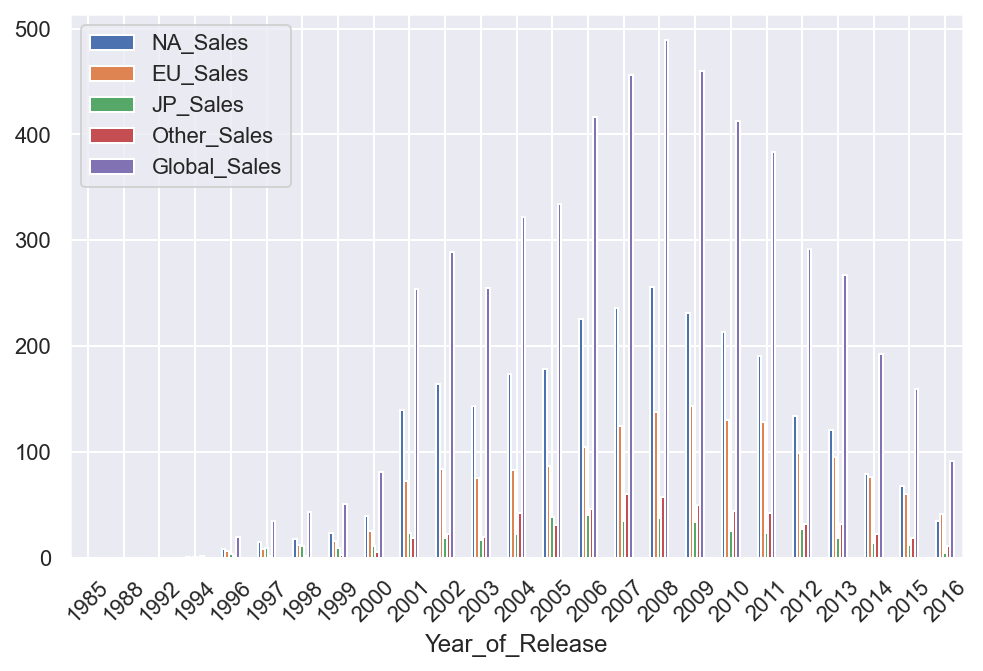

In [8]:
df[[x for x in df.columns if 'Sales' in x] + 
   ['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='bar', rot=45);

## 3. Seaborn

Перейдемо до бібліотеки `seaborn`. `Seaborn` — це по суті більш високорівневий API на базі бібліотеки `matplotlib`. `Seaborn` містить адекватніші налаштування за замовчуванням оформлення графіків. Також в бібліотеці є досить складні типи візуалізації, які в `matplotlib` вимагали б великої кількості коду.

#### pairplot()

Познайомимося з першим таким "складним" типом графіків *pair plot* (*scatter plot matrix*). Ця візуалізація допоможе нам подивитися на одному рисунку, як пов'язані між собою різні ознаки.

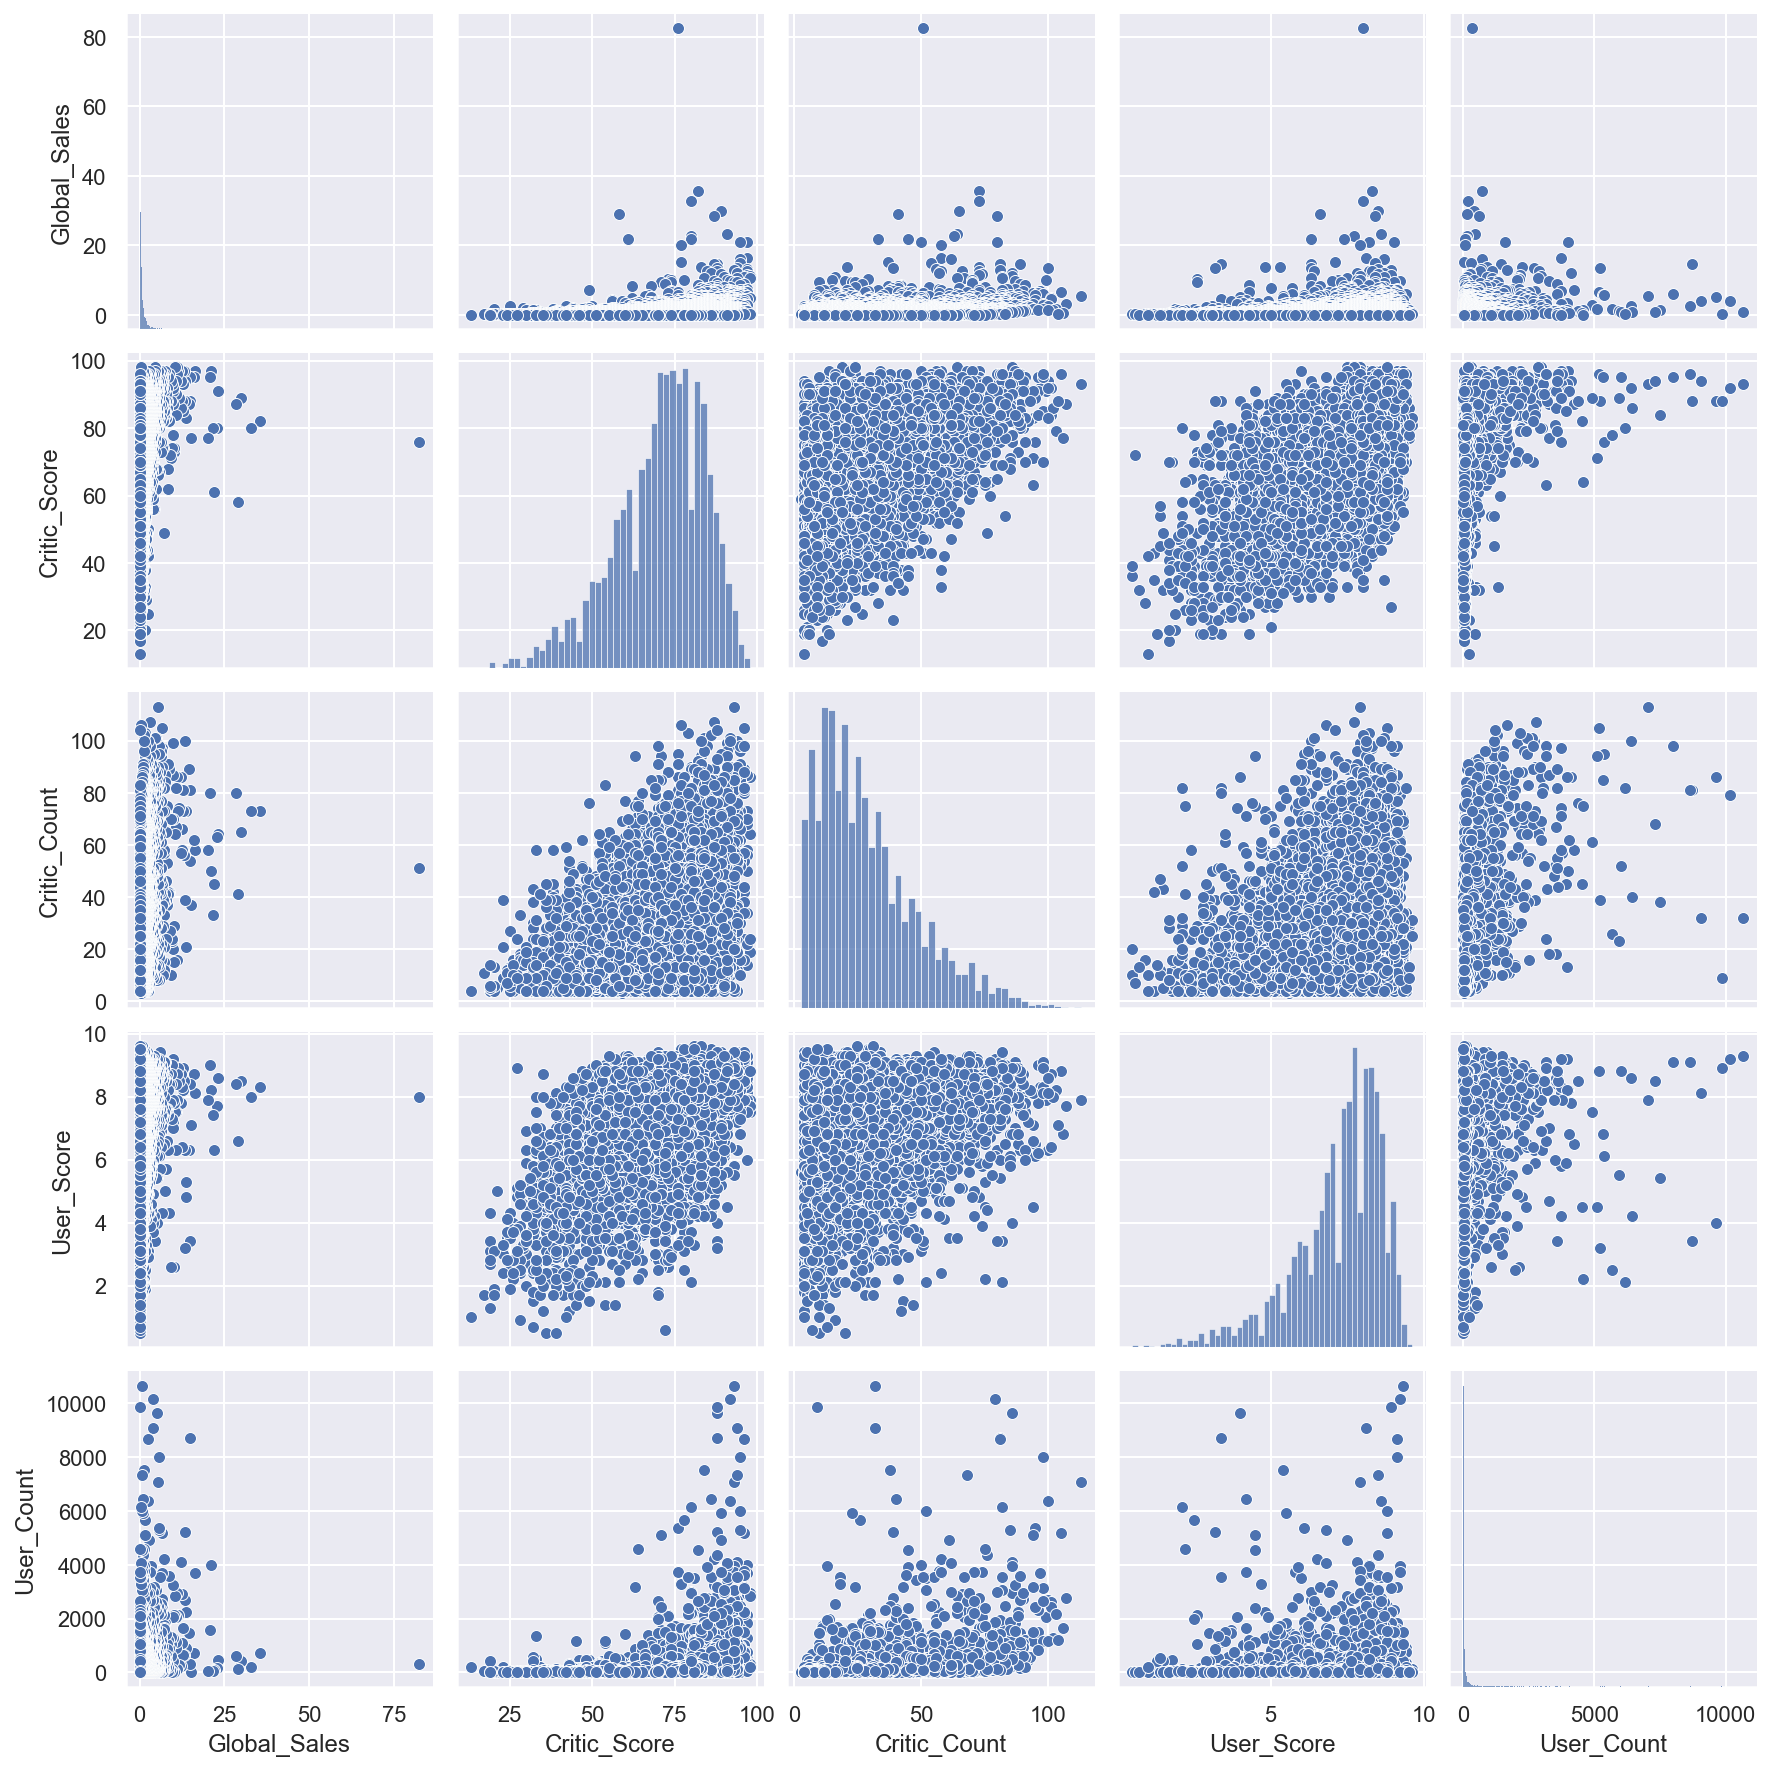

In [9]:
sns.pairplot(df[['Global_Sales', 'Critic_Score', 'Critic_Count', 
                 'User_Score', 'User_Count']]);

Як можна побачити, на діагоналі матриці графіків розташовані гістограми розподілів ознаки. Інші графіки – це звичайні *scatter plots* (діаграми розсіювання, точкові діаграми) для відповідних пар ознак.

#### histplot()

Також за допомогою `seaborn` можна візуалізувати розподіл, для прикладу подивимося на розподіл оцінок критиків `Critic_Score`. Для цього побудуємо *hist plot* (гістограму). Параметр `kde` відповідає за відображення я́дрової оцінки щільності розподілу ([kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)).

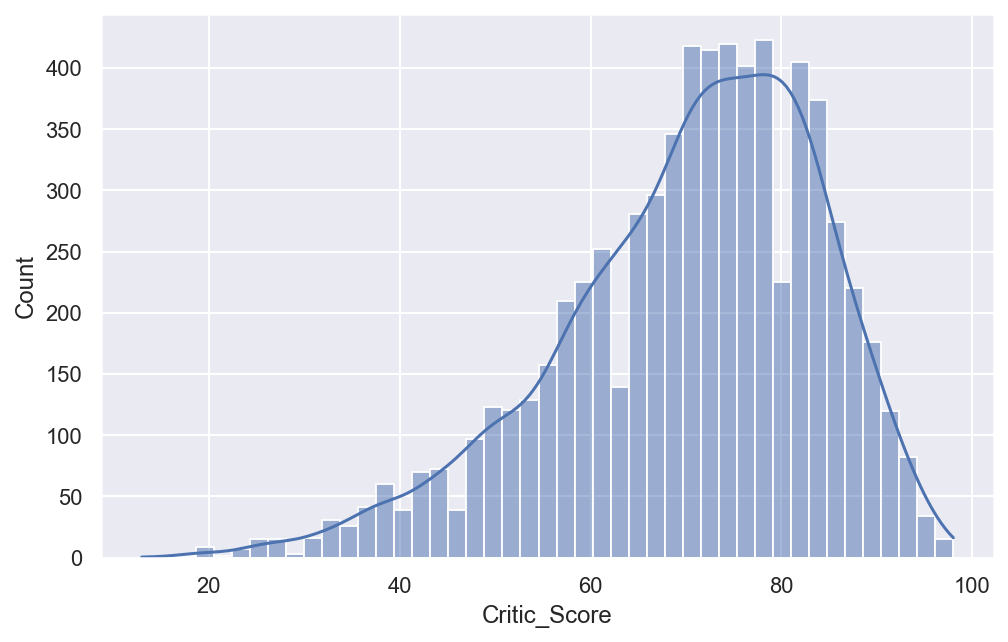

In [10]:
sns.histplot(df['Critic_Score'], kde=True);

#### jointplot()

Для того щоб докладніше подивитися на взаємозв'язок двох кількісних ознак, є ще й *joint plot* – це гібрид *scatter plot* і *histogram* (відображаються також гістограми розподілів ознак). Подивимося на те, як пов'язані між собою оцінка критиків `Critic_Score` і оцінка користувачів `User_Score`.

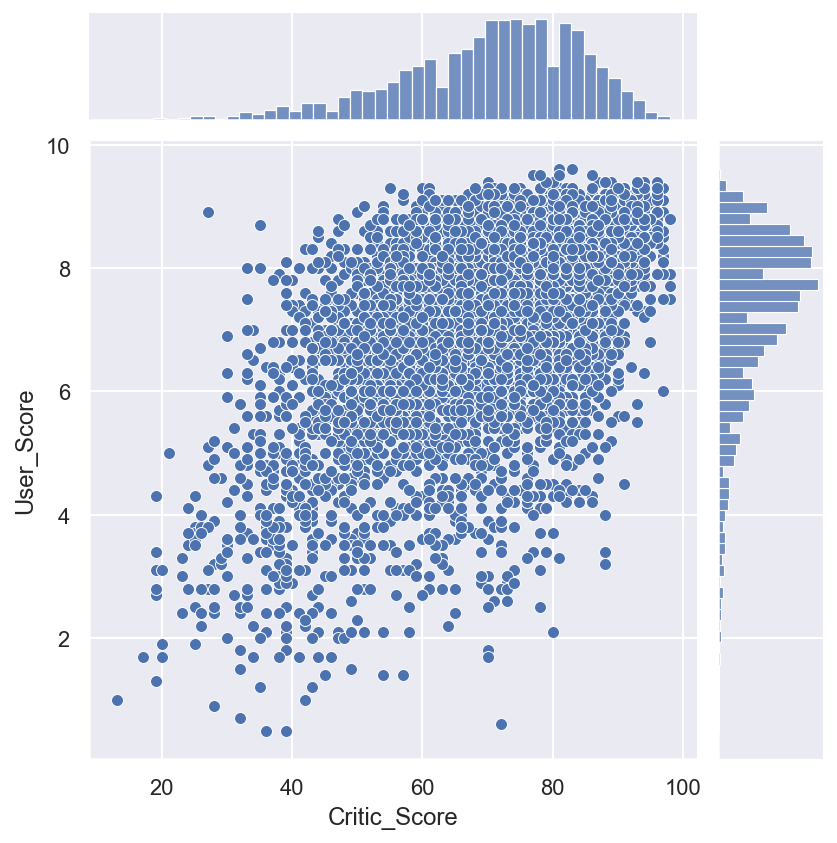

In [11]:
sns.jointplot(x='Critic_Score', y='User_Score', 
              data=df, kind='scatter');

#### boxplot()

Ще один корисний тип графіків – це *box plot* (діаграма розмаху, коро́бчаста діаграма, ящик з вусами). Давайте порівняємо оцінки критиків ігор для топ-5 найбільших ігрових платформ.

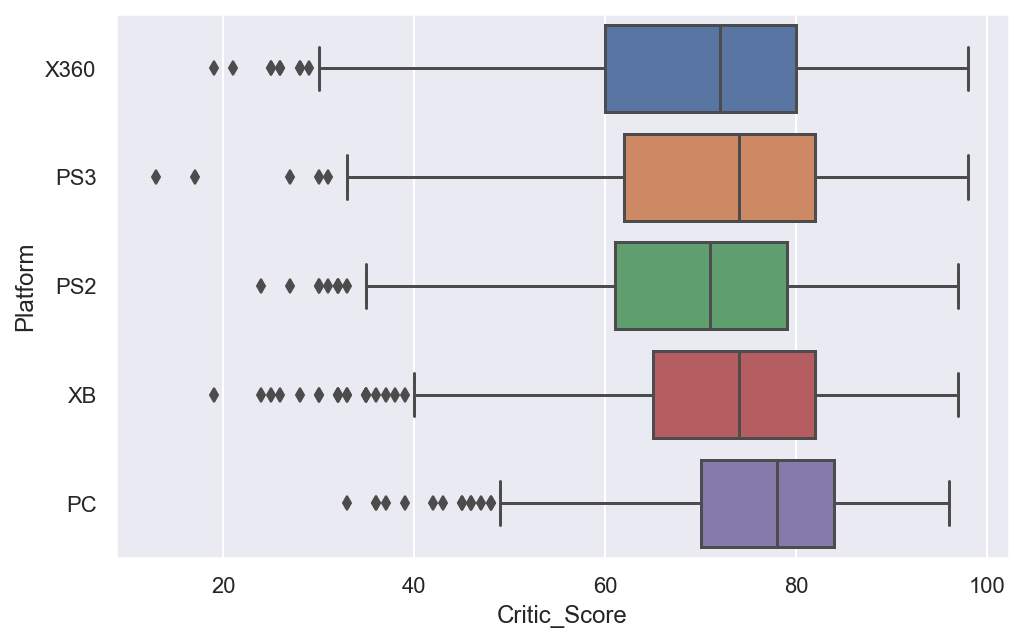

In [12]:
top_platforms = df['Platform'].value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y="Platform", x="Critic_Score", 
            data=df[df['Platform'].isin(top_platforms)]);

Опишемо трохи докладніше, як же розуміти *box plot*. *Box plot* складається з коробки, вусів і точок. Коробка ілюструє інтерквартильний розмах розподілу. Її розміри задаються 25-м процентилем (перший квартиль, $\text{Q1}$) та 75-м процентилем (третій квартиль, $\text{Q3}$) відповідно. Лінія всередині коробки позначає медіану (50%) розподілу.
Вуса відображають весь розкид точок крім викидів, тобто мінімальні і максимальні значення, які потрапляють в проміжок $(\text{Q1} - 1.5\cdot\text{IQR}, \text{Q3} + 1.5\cdot\text{IQR})$, де $\text{IQR} = \text{Q3} - \text{Q1}$ — інтерквартильний розмах. Точками на графіку позначаються викиди (*outliers*) — ті значення, які не вписуються в проміжок значень, заданий вусами графіка.

 На наступному рисунку відображено «ящик з вусами» та щільність розподілу ймовірностей для нормального розподілу.

<img src='../img/boxplot.png' width=60%>

#### heatmap()

І ще один тип графіків — це *heat map* (теплокарта). *Heat map* дозволяє подивитися на розподіл якоїсь кількісної ознаки за двома категоріальними. Візуалізуємо сумарні продажі ігор за жанрами та ігровими платформами.

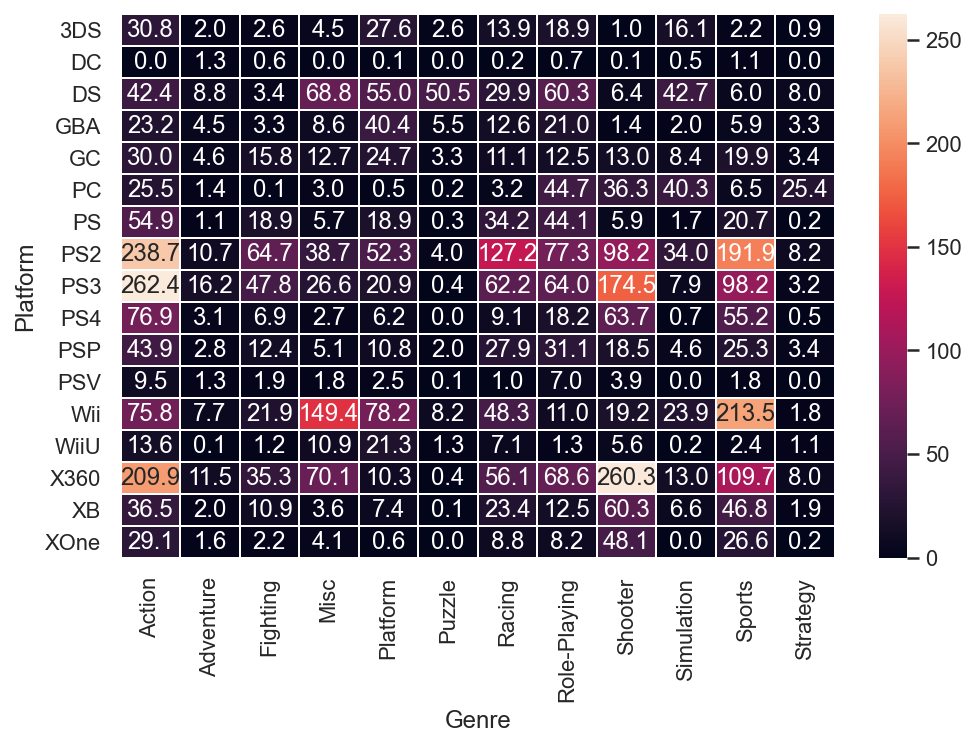

In [13]:
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc='sum').fillna(0).map(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5);

## 4. Plotly

Ми розглянули візуалізації на базі бібліотеки `matplotlib`. Однак, це не єдина можливість побудови графіків на мові `python`. Познайомимося також з бібліотекою `plotly`. `Plotly` – це open-source бібліотека, яка дозволяє будувати інтерактивні графіки в jupyter.notebook без необхідності вникати в javascript код.

Перевага інтерактивних графіків полягає в тому, що можна подивитися точне числове значення при наведенні миші, приховати нецікаві ряди в візуалізації, наблизити певну ділянку графіка і т.д.

Перед початком роботи імпортуємо всі необхідні модулі та ініціалізуємо `plotly` за допомогою команди `init_notebook_mode()`.

In [14]:
# !pip install plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

#### Line plot
Для початку побудуємо *line plot* з динамікою кількості ігор, що вийшли та їх продажів за роками.

In [15]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(
    df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales', 'Number_of_Games']

В `plotly` будується візуалізація об'єкта `Figure`, який складається з даних (масив ліній, які в бібліотеці називаються `traces`) і оформлення/стилю, за який відповідає об'єкт `layout`. У простих випадках можна викликати функцію `iplot` і просто від масиву `traces`.

In [16]:
trace0 = go.Scatter(
    x=years_df.index,
    y=years_df['Global_Sales'],
    name='Глобальні продажі'
)

trace1 = go.Scatter(
    x=years_df.index,
    y=years_df['Number_of_Games'],
    name='Кількість випущених ігор'
)

data = [trace0, trace1]
layout = {'title': 'Статистика для відеоігор'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Параметр `show_link` відповідає за посилання на online-платформу `plot.ly` на графіках. Оскільки зазвичай ця функціональність не потрібна, то можна приховувати це посилання для запобігання випадковим натисненням.

Також можна відразу зберегти графік у вигляді html-файлу.

In [17]:
plotly.offline.plot(fig, filename='years_stats.html', show_link=False);

#### Bar chart

Подивимося також на ринкову частку ігрових платформ, розраховану за кількістю випущених ігор і за сумарним виторгом. Для цього побудуємо *bar chart*.

In [18]:
platforms_df = df.groupby('Platform')[['Global_Sales']].sum().join(
    df.groupby('Platform')[['Name']].count()
)
platforms_df.columns = ['Global_Sales', 'Number_of_Games']
platforms_df.sort_values('Global_Sales', ascending=False, inplace=True)

In [19]:
trace0 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Global_Sales'],
    name='Глобальні продажі'
)

trace1 = go.Bar(
    x=platforms_df.index,
    y=platforms_df['Number_of_Games'],
    name='Кількість випущених ігор'
)

data = [trace0, trace1]
layout = {'title': 'Ринкова частка ігрових платформ'}

fig = go.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

#### Box plot

В `plotly` можна побудувати і *box plot*. Розглянемо відмінності оцінок критиків в залежності від жанру гри.

In [20]:
data = []

for genre in df.Genre.unique():
    data.append(
        go.Box(y=df[df.Genre==genre]['Critic_Score'], name=genre)
    )

iplot(data, show_link=False)

За допомогою `plotly` можна побудувати і інші типи візуалізацій. Бібліотека дозволяє гнучко налаштовувати різні параметри візуалізації: кольори, шрифти, підписи, анотації та багато іншого.

## 5. Корисні ресурси
- Офіційна документація для бібліотек: [`matplotlib`](https://matplotlib.org/contents.html), [`seaborn`](https://seaborn.pydata.org/introduction.html) і [`pandas`](https://pandas.pydata.org/pandas-docs/stable/).
- [Галерея](http://seaborn.pydata.org/examples/index.html) прикладів графіків побудованих з `seaborn`.